# **Feature Selection**

## **Lendo dados pós processo de data prep**

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
abt_00 = pd.read_csv('/content/drive/MyDrive/2. Study  Work/Pod Academy/Ciência de Dados/Projetos/Predicao de Churn - Empresa Telecom/abt_train.csv')
abt_00.drop(axis=1,columns=['Unnamed: 0','customerID','Unnamed: 0.1'],inplace=True)
abt_00.shape

(4930, 31)

In [ ]:
abt_00.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_Yes,Contract_One year,...,InternetService_Fiber optic,InternetService_No,MultipleLines_No phone service,MultipleLines_Yes,PhoneService_Yes,Dependents_Yes,Partner_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,Churn
0,-0.436831,0.881078,0.195927,0.654499,0.968056,-0.524928,1.399708,-0.539991,0.841222,1.917660,...,-0.882690,-0.528699,-0.323478,1.153199,0.323478,1.518718,1.030066,-0.528699,-0.634162,0
1,-0.436831,-1.284263,0.522755,-0.974070,0.968056,-0.524928,1.399708,-0.539991,0.841222,-0.521469,...,1.132901,-0.528699,-0.323478,-0.867153,0.323478,-0.658450,-0.970811,-0.528699,-0.634162,0
2,-0.436831,-0.793997,-1.509551,-0.895013,0.968056,1.905022,-0.714435,-0.539991,-1.188746,1.917660,...,-0.882690,1.891436,-0.323478,-0.867153,0.323478,-0.658450,-0.970811,1.891436,-0.634162,0
3,2.289215,-0.344587,1.053643,-0.010511,-1.032999,-0.524928,1.399708,-0.539991,0.841222,-0.521469,...,1.132901,-0.528699,-0.323478,-0.867153,0.323478,1.518718,1.030066,-0.528699,-0.634162,0
4,2.289215,-1.079985,0.308740,-0.810593,-1.032999,-0.524928,1.399708,-0.539991,0.841222,-0.521469,...,1.132901,-0.528699,-0.323478,-0.867153,0.323478,-0.658450,-0.970811,-0.528699,1.576884,0


## **Treinar modelo com algoritmo Random Forest**

In [ ]:
X = abt_00.drop(axis=1,columns='Churn')
y = abt_00.Churn

# Treinar modelo com algoritmo Random Forest
clf = RandomForestClassifier() # troque aqui qual classificador quer utilizar: GradientBoostingClassifier, DecisionTreeClassifier
clf.fit(X, y)

RandomForestClassifier()

## **Obter importância das variáveis**

Número de features selecionadas:  16


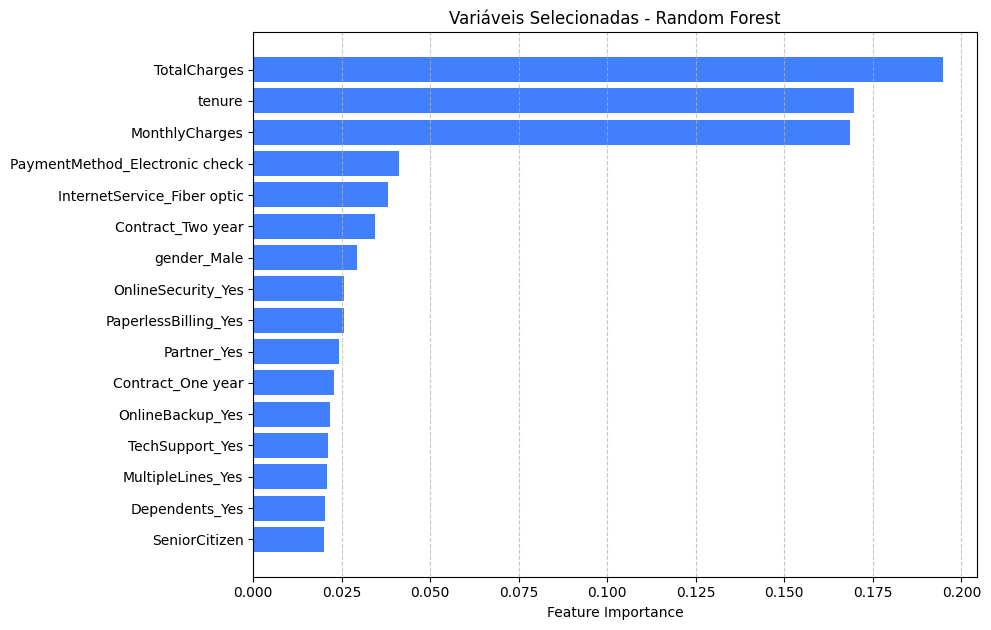

In [ ]:
# Obter importância das variáveis
feature_importances = clf.feature_importances_
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=False)

# Estabelecer um limite de corte, por exemplo, x% da importância máxima
cutoff_maximp = 0.10

cutoff = cutoff_maximp * feature_importances.max()

# Selecionar variáveis acima do corte
selected_features = X.columns[feature_importances > cutoff].tolist()
print('Número de features selecionadas: ',len(selected_features))

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=True)

# Filtrar o DataFrame para apenas as features acima do corte
selected_features_df = features[features['Importance'] > cutoff]

# Ajusta o tamanho da figura com base no número de features selecionadas
plt.figure(figsize=(10, len(selected_features_df)*0.4))

# Plota as features selecionadas
plt.barh(selected_features_df['Feature'], selected_features_df['Importance'], color=(0.25, 0.5, 1))
plt.xlabel("Feature Importance")
plt.title("Variáveis Selecionadas - Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
selected_features

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Male',
 'PaymentMethod_Electronic check',
 'PaperlessBilling_Yes',
 'Contract_One year',
 'Contract_Two year',
 'TechSupport_Yes',
 'OnlineBackup_Yes',
 'InternetService_Fiber optic',
 'MultipleLines_Yes',
 'Dependents_Yes',
 'Partner_Yes',
 'OnlineSecurity_Yes']

## **Correlação de Pearson**

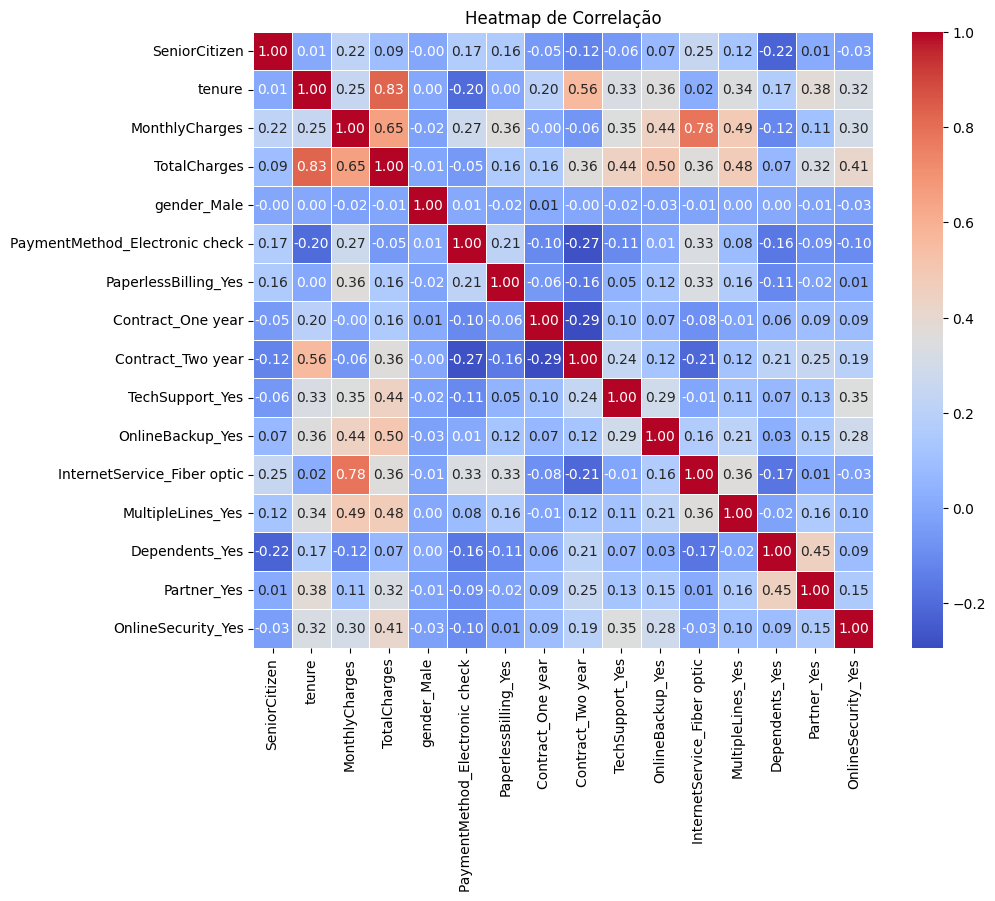

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_correlation_heatmap(dataframe, selected_features):
    # Subconjunto do DataFrame com as variáveis selecionadas
    subset_dataframe = dataframe[selected_features]

    # Calcula a matriz de correlação
    correlation_matrix = subset_dataframe.corr()

    # Configuração do heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

    # Adiciona título
    plt.title('Heatmap de Correlação')

    # Exibe o heatmap
    plt.show()

# Exemplo de uso:
# Supondo que 'df' seja o seu DataFrame e 'selected_features' seja a lista de variáveis
plot_correlation_heatmap(abt_00, selected_features)

In [ ]:
# Salvar a lista em um arquivo .pkl
import pickle
with open('/content/drive/MyDrive/2. Study  Work/Pod Academy/Ciência de Dados/Projetos/Predicao de Churn - Empresa Telecom/02 - Feature Selection/prd_list_features.pkl', 'wb') as f:
    pickle.dump(selected_features, f)

In [ ]:
# Carregar a lista do arquivo .pkl
with open('/content/drive/MyDrive/2. Study  Work/Pod Academy/Ciência de Dados/Projetos/Predicao de Churn - Empresa Telecom/02 - Feature Selection/prd_list_features.pkl', 'rb') as f:
    loaded_lista = pickle.load(f)

print(loaded_lista)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'PaymentMethod_Electronic check', 'PaperlessBilling_Yes', 'Contract_One year', 'Contract_Two year', 'TechSupport_Yes', 'OnlineBackup_Yes', 'InternetService_Fiber optic', 'MultipleLines_Yes', 'Dependents_Yes', 'Partner_Yes', 'OnlineSecurity_Yes']


In [ ]:
lista_features = loaded_lista + ['Churn']
abt_01 = abt_00[lista_features]

abt_01.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,PaymentMethod_Electronic check,PaperlessBilling_Yes,Contract_One year,Contract_Two year,TechSupport_Yes,OnlineBackup_Yes,InternetService_Fiber optic,MultipleLines_Yes,Dependents_Yes,Partner_Yes,OnlineSecurity_Yes,Churn
0,-0.436831,0.881078,0.195927,0.654499,0.968056,1.399708,0.841222,1.917660,-0.562826,1.566008,1.370398,-0.882690,1.153199,1.518718,1.030066,-0.634162,0
1,-0.436831,-1.284263,0.522755,-0.974070,0.968056,1.399708,0.841222,-0.521469,-0.562826,-0.638566,-0.729715,1.132901,-0.867153,-0.658450,-0.970811,-0.634162,0
2,-0.436831,-0.793997,-1.509551,-0.895013,0.968056,-0.714435,-1.188746,1.917660,-0.562826,-0.638566,-0.729715,-0.882690,-0.867153,-0.658450,-0.970811,-0.634162,0
3,2.289215,-0.344587,1.053643,-0.010511,-1.032999,1.399708,0.841222,-0.521469,1.776747,-0.638566,-0.729715,1.132901,-0.867153,1.518718,1.030066,-0.634162,0
4,2.289215,-1.079985,0.308740,-0.810593,-1.032999,1.399708,0.841222,-0.521469,-0.562826,-0.638566,-0.729715,1.132901,-0.867153,-0.658450,-0.970811,1.576884,0


In [ ]:
abt_01_test = pd.read_csv('/content/drive/MyDrive/2. Study  Work/Pod Academy/Ciência de Dados/Projetos/Predicao de Churn - Empresa Telecom/abt_test.csv')
abt_01_test.drop(axis=1,columns=['Unnamed: 0','customerID','Unnamed: 0.1'],inplace=True)
abt_01_test.shape

(2113, 31)

In [ ]:
abt_01_test.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_Yes,Contract_One year,...,InternetService_Fiber optic,InternetService_No,MultipleLines_No phone service,MultipleLines_Yes,PhoneService_Yes,Dependents_Yes,Partner_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,Churn
0,-0.436831,-1.284263,-1.327058,-0.998679,-1.032999,-0.524928,1.399708,-0.539991,0.841222,-0.521469,...,-0.882690,-0.528699,3.091399,-0.867153,-3.091399,-0.658450,1.030066,-0.528699,-0.634162,1
1,-0.436831,0.349957,-1.312127,-0.569780,0.968056,-0.524928,-0.714435,-0.539991,0.841222,-0.521469,...,-0.882690,1.891436,-0.323478,1.153199,0.323478,-0.658450,-0.970811,1.891436,-0.634162,0
2,-0.436831,0.799367,-1.507892,-0.554221,-1.032999,-0.524928,-0.714435,1.851883,-1.188746,-0.521469,...,-0.882690,1.891436,-0.323478,-0.867153,0.323478,1.518718,1.030066,1.891436,-0.634162,0
3,-0.436831,-1.284263,0.383397,-0.975924,-1.032999,-0.524928,1.399708,-0.539991,-1.188746,-0.521469,...,1.132901,-0.528699,-0.323478,-0.867153,0.323478,-0.658450,-0.970811,-0.528699,-0.634162,1
4,-0.436831,1.412199,-0.472660,0.429422,0.968056,-0.524928,-0.714435,-0.539991,-1.188746,-0.521469,...,-0.882690,-0.528699,-0.323478,-0.867153,0.323478,-0.658450,-0.970811,-0.528699,-0.634162,0


## **Salvando abt para treinamento dos modelos**

In [ ]:
# Salvando abt para treinamento dos modelos

abt_01.to_csv('/content/drive/MyDrive/2. Study  Work/Pod Academy/Ciência de Dados/Projetos/Predicao de Churn - Empresa Telecom/abt_fs01_train.csv')
abt_01_test.to_csv('/content/drive/MyDrive/2. Study  Work/Pod Academy/Ciência de Dados/Projetos/Predicao de Churn - Empresa Telecom/abt_fs01_test.csv')